### PyTorch Introduction
#### LINK: https://pytorch.org/tutorials/beginner/introyt/introyt1_tutorial.html

In [1]:
import torch

In [3]:
# create a tensor
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [4]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [8]:
# it is common to initialize with a manual seed so that we can reproduce the results by passing the same params
torch.manual_seed(1729)
r1 = torch.rand(2, 2)
print('A random tensor:')
print(r1)

r2 = torch.rand(2, 2)
print('\nA different random tensor:')
print(r2) # new values

torch.manual_seed(1729)
r3 = torch.rand(2, 2)
print('\nShould match r1:')
print(r3) # repeats values of r1 because of re-seed

A random tensor:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])

A different random tensor:
tensor([[0.4216, 0.0691],
        [0.2332, 0.4047]])

Should match r1:
tensor([[0.3126, 0.3791],
        [0.3087, 0.0736]])


In [12]:
# Tensor operations
ones = torch.ones(2, 2)
print(ones)
twos = ones * 2 # every element is multiplied by 2
print(twos)

threes = ones + twos # addition is allowed becausee shapes are similar
print(threes) # tensors are added element wise
print(threes.shape) # resulting in the same dimensions as the input tensors

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)

# r3 = r1 + r2 # error, no the same shape


tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[3., 3.],
        [3., 3.]])
torch.Size([2, 2])


In [29]:
# small sample of mathematical operations on tensors
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))


A random matrix, r:
tensor([[ 0.8008, -0.2010],
        [ 0.2648,  0.8928]])

Absolute value of r:
tensor([[0.8008, 0.2010],
        [0.2648, 0.8928]])

Inverse sine of r:
tensor([[ 0.9286, -0.2024],
        [ 0.2680,  1.1035]])

Determinant of r:
tensor(0.7681)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[ 0.1679,  0.9858],
        [ 0.9858, -0.1679]]),
S=tensor([0.9342, 0.8222]),
V=tensor([[ 0.4233,  0.9060],
        [ 0.9060, -0.4233]]))

Average and standard deviation of r:
(tensor(0.5089), tensor(0.4393))

Maximum value of r:
tensor(0.8928)


### PyTorch Models

In [31]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

In [40]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # 1 input image channel (black & white), 6 output channels, 3x3 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120) # 6 * 6 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:] # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [41]:
net = LeNet()
print(net)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [42]:
input = torch.rand(1, 1, 32, 32) # stand-in for a 32x32 black & white image
print("\nImage batch shape: ")
print(input.shape)


Image batch shape: 
torch.Size([1, 1, 32, 32])


In [43]:
output = net(input)
print("\nRaw output: ")
print(output)
print(output.shape)


Raw output: 
tensor([[ 0.0743, -0.0247,  0.0293, -0.0267,  0.0173,  0.0341,  0.0910, -0.0185,
         -0.0400,  0.0520]], grad_fn=<AddmmBackward0>)
torch.Size([1, 10])


### Datasets and Dataloaders

In [56]:
#%matplotlib inline

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [75]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

In [76]:
trainset = torchvision.datasets.CIFAR10(
    root="/home/irikos/Work/datasets/pytorch_tutorials",
    train=True,
    download=True,
    transform=transform
)

Files already downloaded and verified


In [77]:
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

In [78]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5 # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

 ship   dog truck   car


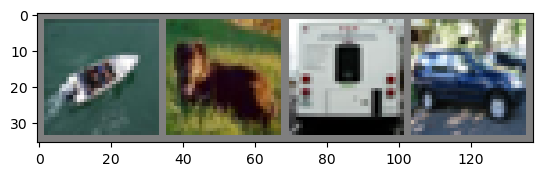

In [79]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

### Training your PyTorch Model

In [80]:
#%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [106]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]
)

trainset = torchvision.datasets.CIFAR10(
    root="/home/irikos/Work/datasets/pytorch_tutorials",
    train=True,
    download=True,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=4,
    shuffle=True,
    num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root="/home/irikos/Work/datasets/pytorch_tutorials",
    train=False,
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=4,
    shuffle=False,
    num_workers=2
)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [86]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

 frog  ship  ship  bird


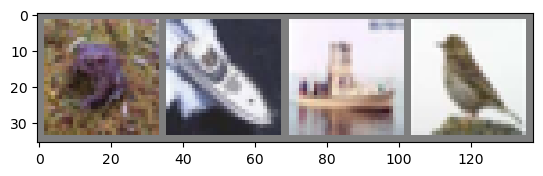

In [87]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [96]:
# LeNet adapted for 3 channel images
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [97]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.09)

In [107]:
# Train
for epoch in range(5): # loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        
print('Finished Training')

Finished Training


In [108]:
# Test
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
        

Accuracy of the network on the 10000 test images: 57 %
